<a href="https://colab.research.google.com/github/BallAd15/PlantDiseaseIdentification/blob/main/PlantDiseasesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Prepare the Data

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload() #Upload api key

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adityabaliga","key":"d68ad90f91fee6ab3f3d2d3a976cc172"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/ #Copy kaggle file into new directory

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json #Grant file permissions

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset # Download the dataset

new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


The files downloaded are a Zip file. Hence  to unzip

In [ ]:
# /content/new-plant-diseases-dataset.zip
import zipfile
zip_ref = zipfile.ZipFile('new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

### 1.1 Loading raw data using PyTorch

In [ ]:
import torch
from torchvision import datasets, transforms

# Define the paths to your dataset folders
train_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
val_data_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Define
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the image to 224x224
    transforms.ToTensor(),          # Convert the PIL image to a PyTorch Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])


# Load training data
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load validation data
val_dataset = datasets.ImageFolder(root=val_data_dir, transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
len(train_dataset), len(val_dataset)

(70295, 17572)

In [ ]:
image = train_dataset[0]
image

(tensor([[[ 0.7419,  0.7419,  0.7591,  ...,  1.0844,  1.0844,  1.0844],
          [ 0.7933,  0.8104,  0.7933,  ...,  1.0673,  1.0673,  1.0502],
          [ 0.7762,  0.8104,  0.8104,  ...,  1.0673,  1.0331,  0.9817],
          ...,
          [-0.3198, -0.3369, -0.3541,  ...,  0.0227,  0.0398,  0.0398],
          [-0.3369, -0.3541, -0.4054,  ...,  0.0056, -0.0116,  0.0056],
          [-0.3541, -0.3883, -0.4397,  ..., -0.0287, -0.0116,  0.0227]],
 
         [[ 0.8179,  0.8179,  0.8354,  ...,  1.1856,  1.1856,  1.1856],
          [ 0.8704,  0.8880,  0.8704,  ...,  1.1681,  1.1681,  1.1506],
          [ 0.8529,  0.8880,  0.8880,  ...,  1.1681,  1.1331,  1.0805],
          ...,
          [-0.3725, -0.3901, -0.4076,  ..., -0.1275, -0.1099, -0.1099],
          [-0.3901, -0.4076, -0.4601,  ..., -0.1450, -0.1625, -0.1450],
          [-0.4076, -0.4426, -0.4951,  ..., -0.1800, -0.1625, -0.1275]],
 
         [[ 1.6117,  1.6117,  1.6291,  ...,  1.9080,  1.9080,  1.9080],
          [ 1.6640,  1.6814,

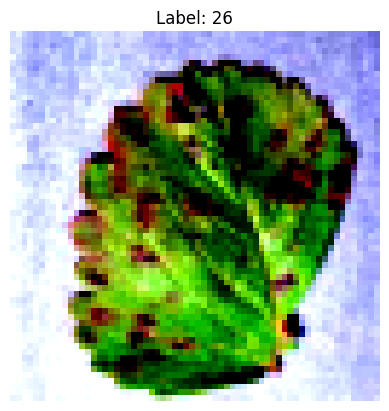

In [ ]:
import matplotlib.pyplot as plt

# Accessing the image and its label
image, label = train_dataset[50000]

plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
train_dataset.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
# Indexes to classes
class_names = train_dataset.classes
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

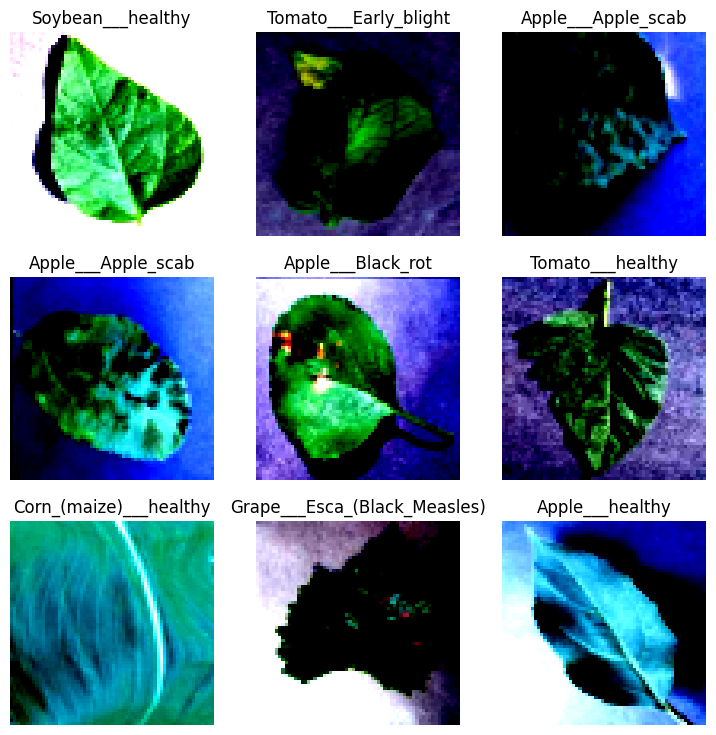

In [ ]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item() # Size is for the shape of output tensor (number of random numbers generated)
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis(False)

### 1.2 Prepare Dataloader

In [ ]:
BATCH_SIZE = 32
print(f"Dataloaders: {train_loader, val_loader}")
print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(val_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ef8f3345d20>, <torch.utils.data.dataloader.DataLoader object at 0x7ef8f3345390>)
Length of train dataloader: 2197 batches of 32
Length of validation dataloader: 550 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

Image size: torch.Size([3, 64, 64])
Label: 16, label size: torch.Size([])


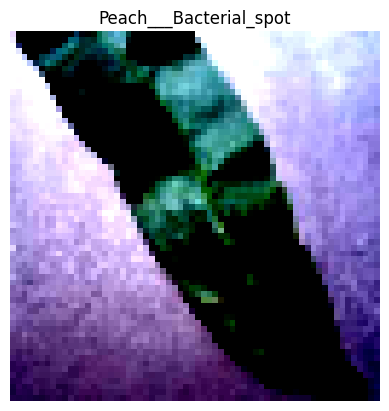

In [ ]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 2. Build A Baseline Model

In [ ]:
# Create a flatten layer
from torch import nn
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass internally

#Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_Channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([3, 64, 64]) -> [color_Channels, height, width]
Shape after flattening: torch.Size([3, 4096]) -> [color_channels, height*width]


In [ ]:
# First model
class BaselineModel(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):

        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [ ]:
# Device Agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Create instance of our model
torch.manual_seed(42)

# Setup model with input parameters
model_1 = BaselineModel(
    input_shape=3*64*64,
    hidden_units=10,    # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to(device)

model_1

BaselineModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=38, bias=True)
  )
)

### 2.1 Setup Loss, Optimizer and Evaluation metrics

Loss function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()

Optimizer - torch.optim.SGD() (stochastic gradient descent)

Evaluation metric - since we're working on a classification problem, let's use our accuracy as our evaluation metric

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 2.2 Setup Timer function

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float
                     ):
    """Prints difference between start and end time."""
    total_time = end-start
    print(f"Train time : {total_time:.3f} seconds")
    return total_time

### 2.3 Training and testing loops

In [ ]:
train_time_start = timer()

epochs = 3

for epoch in (range(epochs)):
    if epoch%10==0 or epoch<10:
        print(f"Epoch: {epoch}\n-----")

    ### Training
    train_loss = 0
    # loop through the training batches
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)

        model_1.train()
        # Forward pass
        y_pred = model_1(X)

        # Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        if batch % 400 == 0:           # len(X)=32
            print(f"Looked at {batch * len(X)}/{len(train_loader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_loader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_1.eval()  # Put it in evaluation mode
    with torch.inference_mode(): # Put it in inference mode
        for X_test, y_test in val_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model_1(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test,
                                   y_pred=test_pred.argmax(dim=1)
                                   )

        # Calculate the test loss average per batch
        test_loss /= len(val_loader)

        # Calculate the test acc average per batch
        test_acc /= len(val_loader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss: .4f} | Validation loss: {test_loss: .4f}, Validation acc: {test_acc: .4f}")

# Calculate training time
train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end)

Epoch: 0
-----
Looked at 0/70295 samples
Looked at 12800/70295 samples
Looked at 25600/70295 samples
Looked at 38400/70295 samples
Looked at 51200/70295 samples
Looked at 64000/70295 samples

Train loss:  nan | Validation loss:  nan, Validation acc:  2.8636
Epoch: 1
-----
Looked at 0/70295 samples
Looked at 12800/70295 samples
Looked at 25600/70295 samples
Looked at 38400/70295 samples
Looked at 51200/70295 samples
Looked at 64000/70295 samples

Train loss:  nan | Validation loss:  nan, Validation acc:  2.8636
Epoch: 2
-----
Looked at 0/70295 samples
Looked at 12800/70295 samples
Looked at 25600/70295 samples
Looked at 38400/70295 samples
Looked at 51200/70295 samples
Looked at 64000/70295 samples

Train loss:  nan | Validation loss:  nan, Validation acc:  2.8636
Train time : 477.533 seconds


## 3. Model Evaluation

In [ ]:
def eval_model(model: torch.nn.Module, #type
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in (data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
# Calculate model 1 results on test_dataset
# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=val_loader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'BaselineModel',
 'model_loss': nan,
 'model_acc': 2.8636363636363638}

## 4. Build a CNN Model

In [ ]:
# Create a convolutional neural network
class CNNModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [ ]:
# Instantiate Model
model_2 = CNNModel(input_shape=3,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)
model_2

CNNModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=38, bias=True)
  )
)

### 4.2 Setup Accuracy function, Loss function and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### 4.3 Training and Testing

In [ ]:
# Create train_step and test_stup functions
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc=0, 0

    # Put model into training mode
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1)
                                   )

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"Test loss: {test_loss: .5f}, Test acc: {test_acc: .2f}%")

In [ ]:
## Training and testing model_2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in (range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
               data_loader = train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              test_dataloader=val_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2)

Epoch: 0
-------
Train loss: 0.39597 | Train acc: 87.64%
Test loss:  0.64905, Test acc:  81.72%
Epoch: 1
-------
Train loss: 0.37534 | Train acc: 88.22%
Test loss:  0.62897, Test acc:  81.84%
Epoch: 2
-------
Train loss: 0.35556 | Train acc: 88.76%
Test loss:  0.58710, Test acc:  82.81%
Train time : 422.803 seconds


In [ ]:
# Evaluate model_2
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=val_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

model_2_results

{'model_name': 'CNNModel',
 'model_loss': 0.5871002674102783,
 'model_acc': 82.8125}

## 5. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,BaselineModel,NaN,2.863636
1,CNNModel,0.5871,82.812500


In [ ]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,BaselineModel,NaN,2.863636,477.533165
1,CNNModel,0.5871,82.812500,422.803437


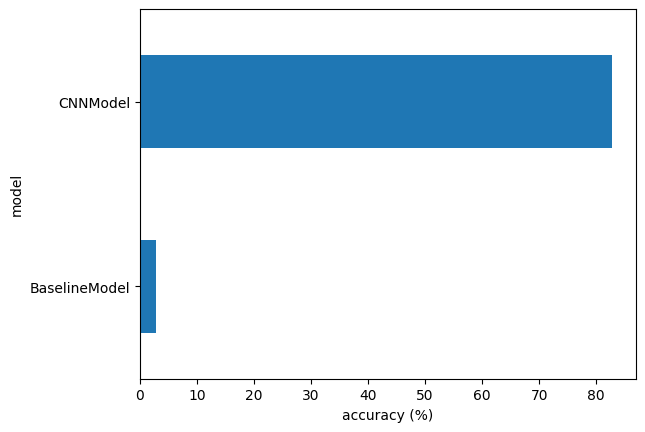

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");